# Task 2: Prediction usng Supervised ML

### KMeans clustering

Problem Statement:Predict the optimum number of clusters and represent it visually from the iris dataset

submitted by Muskan Hirwani

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)


### Visualization

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
#checking if there is any null value
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
#dropping into two features for simpler visualization
df.drop(['sepal length (cm)', 'sepal width (cm)',],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### KMeans Algorithm

In [99]:
#importing KMeans from sklearn
library
from sklearn.cluster import KMeans

In [107]:
# training the model for km=3 i.e. cluster=3
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)


In [113]:
#printing predicted value
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
#adding to dataframe
df['clusters'] = yp
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2


In [115]:
df.tail()

,petal length (cm),petal width (cm),clusters
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0
149,5.1,1.8,0


In [116]:
#unique method is to know all type of unique values in the column clusters
df.clusters.unique()

array([2, 1, 0])

In [117]:
#divides dataframe into three parts for each cluster
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

In [118]:
#finds centroid for  all three clusters
km.cluster_centers_

array([[ 5.59583333e+00,  2.03750000e+00,  2.00000000e+00],
       [ 4.26923077e+00,  1.34230769e+00, -8.88178420e-16],
       [ 1.46200000e+00,  2.46000000e-01,  1.00000000e+00]])

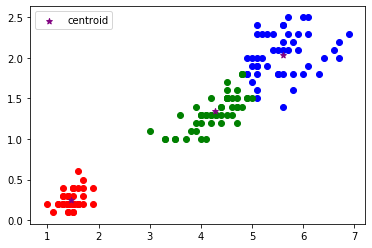

In [119]:
#visualising
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [120]:
#this finds Sum of squared errors
km.inertia_


31.371358974358976

In [121]:
#finds sum of squared errors for k=1 to 10
sse=[]
krange = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    

In [122]:
#prints sum of squared errors

sse

[648.8686666666667,
 112.09788472964945,
 31.371358974358976,
 22.69250480769231,
 14.206793675889328,
 11.41219696969697,
 9.380497759103644,
 7.788416714864084,
 6.868081395797187]


### Elbow plot
Elbow plot is used to determine the most optimal  value of k representing number of cluster in K-means clustering algorithm.

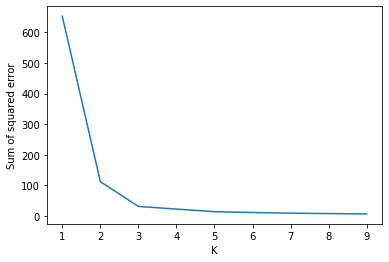

In [73]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(krange,sse)

Here, the elbow point is at K=3, therefore the most optimal value for K is 3 .